## A/B Testing Project

In [1]:
# Import Libraries

import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

df = pd.read_csv("Dataset/marketing_AB.csv")

### Exploratory Data Analysis

In [3]:
# Basic overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [4]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [5]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [6]:
# Checking for Missing or Duplicate data

missing_data = df.isnull().sum()

duplicated_data = print(df['user id'].duplicated().sum())

print(missing_data, duplicated_data)

0
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64 None


In A/B Testing, duplicate users can result in bias, especially if they appear in both groups. In this case, we have no duplicates in our dataset.

In [7]:
# Group distribution

df['test group'].value_counts(normalize=True)

test group
ad     0.96
psa    0.04
Name: proportion, dtype: float64

An ideal distribution is an even 50/50 split between both groups. This distribution means that the A/B test groups are not balanced, and it is a problem.

### Calculating Conversion Rates

In [8]:
grouped = df.groupby('test group')['converted'].agg(['sum', 'count'])
grouped['conversion_rate'] = grouped['sum'] / grouped['count']
print(grouped)

              sum   count  conversion_rate
test group                                
ad          14423  564577         0.025547
psa           420   23524         0.017854


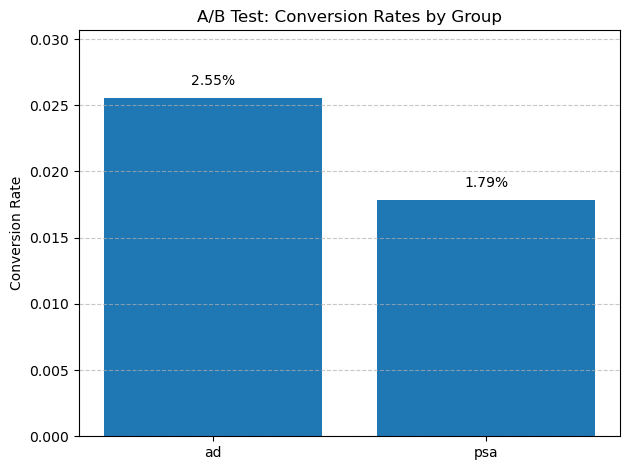

In [9]:
# Bar plot of conversion rates
conversion_rates = grouped['conversion_rate'].values
group_labels = grouped.index.tolist()

plt.bar(group_labels, conversion_rates)
plt.ylabel('Conversion Rate')
plt.title('A/B Test: Conversion Rates by Group')
plt.ylim(0, max(conversion_rates)*1.2)

# Annotate bars
for i, rate in enumerate(conversion_rates):
    plt.text(i, rate + 0.001, f'{rate:.2%}', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Perform Z-Test for Proportions

In [10]:
conversions = grouped['sum'].values
totals = grouped['count'].values

# Run Z-Test
z_stat, p_value = proportions_ztest(count=conversions, nobs=totals)
print(f"Z_statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpretation

if p_value < 0.05:
    print("Result: Statistically significant difference.")
else:
    print("Result: No statistically significant difference")

Z_statistic: 7.3701
P-value: 1.7053e-13
Result: Statistically significant difference.


We used Z-Test as our statistic test because:
- We are comparing proportions
- We have large enough samples

### Conclusion

Looking out the conversion rate, we see that the ad group had a higher conversion rate compared to the psa group. We can see that users are converted more in through ads compared to Public Service Announcement. Now, how significant is this? After conducting the Z-Test, we found the p-value to be less than 0.05, which we can conclude that there is statistically significant difference.

However, it is important to note again that the distribution between the two groups are severely imbalanced, which renders this results to be unreliable.